#### 1.Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
from IPython.display import Audio
from gtts import gTTS

#### 2.Keypoints using MP Holistics

In [2]:
mp_holistic = mp.solutions.holistic          
mp_drawing = mp.solutions.drawing_utils      

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)     
    image.flags.writeable = False                    
    results = model.process(image)                   
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)    
    return image,results

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks , mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks , mp_holistic.POSE_CONNECTIONS)   
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks , mp_holistic.HAND_CONNECTIONS)   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks , mp_holistic.HAND_CONNECTIONS)   

In [5]:
def draw_styled_landmarks(image,results):
    #draw face connection
    mp_drawing.draw_landmarks(image, results.face_landmarks , mp_holistic.FACEMESH_CONTOURS ,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    #draw pose connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks , mp_holistic.POSE_CONNECTIONS ,
                              mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) 
    #draw left_hand connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks , mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,76),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,250),thickness=2,circle_radius=2))  
    #draw right_hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks , mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))   

In [6]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret,frame = cap.read()
        image,results = mediapipe_detection(frame,holistic)

        draw_styled_landmarks(image,results)
        
        cv2.imshow('OpenCV Feed',image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [8]:
cap.release()
cv2.destroyAllWindows()

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
frame

array([[[186, 186, 186],
        [187, 186, 186],
        [187, 185, 185],
        ...,
        [169, 169, 169],
        [179, 179, 179],
        [180, 180, 180]],

       [[187, 187, 187],
        [186, 186, 186],
        [185, 185, 185],
        ...,
        [175, 175, 175],
        [180, 180, 180],
        [180, 180, 180]],

       [[190, 190, 190],
        [190, 190, 190],
        [183, 183, 183],
        ...,
        [180, 180, 180],
        [180, 180, 180],
        [180, 180, 180]],

       ...,

       [[ 69,  71,  60],
        [ 69,  70,  64],
        [ 70,  70,  70],
        ...,
        [146, 146, 143],
        [143, 143, 143],
        [142, 142, 142]],

       [[ 64,  70,  65],
        [ 66,  69,  67],
        [ 71,  71,  71],
        ...,
        [145, 146, 143],
        [143, 143, 143],
        [143, 143, 144]],

       [[ 62,  70,  65],
        [ 65,  70,  67],
        [ 70,  70,  70],
        ...,
        [148, 146, 143],
        [144, 144, 144],
        [144, 144, 145]]

In [11]:
results.left_hand_landmarks

landmark {
  x: 0.8911072015762329
  y: 0.725021481513977
  z: 2.6537756525613077e-07
}
landmark {
  x: 0.8379135727882385
  y: 0.7294310927391052
  z: -0.021983005106449127
}
landmark {
  x: 0.7804670333862305
  y: 0.7092970609664917
  z: -0.03275962546467781
}
landmark {
  x: 0.7380853891372681
  y: 0.6823376417160034
  z: -0.04166736826300621
}
landmark {
  x: 0.7013497352600098
  y: 0.6678449511528015
  z: -0.04926628991961479
}
landmark {
  x: 0.7730605006217957
  y: 0.6041918396949768
  z: -0.01250126026570797
}
landmark {
  x: 0.7340939044952393
  y: 0.5489187240600586
  z: -0.02737104706466198
}
landmark {
  x: 0.7141982913017273
  y: 0.5146629810333252
  z: -0.04073680564761162
}
landmark {
  x: 0.6990935802459717
  y: 0.48290836811065674
  z: -0.05039435997605324
}
landmark {
  x: 0.7956154346466064
  y: 0.5761803984642029
  z: -0.013075790368020535
}
landmark {
  x: 0.7568439245223999
  y: 0.5136716365814209
  z: -0.023558326065540314
}
landmark {
  x: 0.735114574432373
  y:

In [12]:
draw_landmarks(frame,results)

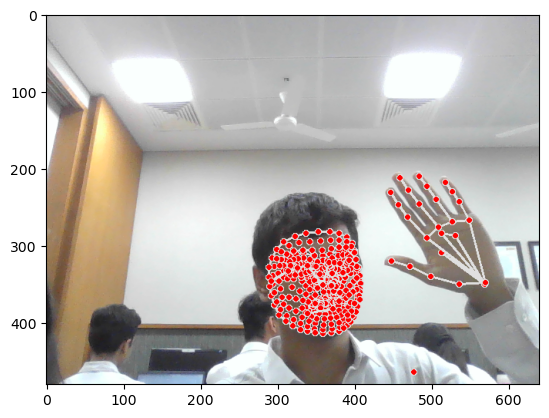

In [13]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [14]:
draw_styled_landmarks(frame,results)

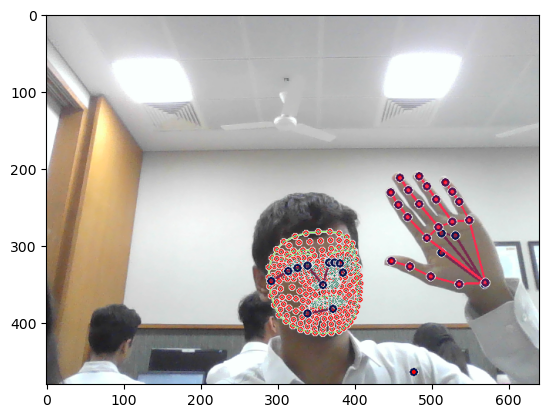

In [15]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

#### 3.Extract Keypoint Values

In [16]:
len(results.pose_landmarks.landmark)

33

In [17]:
pose=[]
if results.pose_landmarks.landmark :
    for res in results.pose_landmarks.landmark:
        test = np.array([res.x,res.y,res.z,res.visibility])
        pose.append(test)
    pose=np.array(pose).flatten()
else:
    pose=np.zeros(33*4)


In [18]:
face=[]
if results.face_landmarks.landmark :
    for res in results.face_landmarks.landmark:
        test = np.array([res.x,res.y,res.z])
        face.append(test)
    face = np.array(face).flatten()
else:
    face=np.zeros(468*3)


In [19]:
lh=[]
if results.left_hand_landmarks :
    for res in results.left_hand_landmarks.landmark:
        test = np.array([res.x,res.y,res.z])
        lh.append(test)
    lh = np.array(lh).flatten()
else:
    lh=np.zeros(21*3)


In [20]:
rh=[]
if results.right_hand_landmarks :
    for res in results.right_hand_landmarks.landmark:
        test = np.array([res.x,res.y,res.z])
        rh.append(test)
    rh = np.array(rh).flatten()
else:
    rh=np.zeros(21*3)


In [21]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
def extract_keypoints (results):
    pose=[]
    face=[]
    lh=[]
    rh=[]
    
    #extracting keypoints of pose_landmarks
    if results.pose_landmarks.landmark :
        for res in results.pose_landmarks.landmark:
            test = np.array([res.x,res.y,res.z,res.visibility])
            pose.append(test)
        pose=np.array(pose).flatten()
    else:
        pose=np.zeros(33*4)
    
    #extracting keypoints of face_landmarks
    if results.face_landmarks.landmark :
        for res in results.face_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            face.append(test)
        face = np.array(face).flatten()
    else:
        face=np.zeros(468*3)
    
    #extracting keypoints of left_hand_landmarks
    if results.left_hand_landmarks :
        for res in results.left_hand_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            lh.append(test)
        lh = np.array(lh).flatten()
    else:
        lh=np.zeros(21*3)
    
    #extracting keypoints of right_hand_landmarks
    if results.right_hand_landmarks :
        for res in results.right_hand_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            rh.append(test)
        rh = np.array(rh).flatten()
    else:
        rh=np.zeros(21*3)
    
    return np.concatenate([pose,face,lh,rh])

In [25]:
result_test = extract_keypoints(results)

In [26]:
result_test

array([ 0.56191409,  0.73131835, -0.79350579, ...,  0.        ,
        0.        ,  0.        ])

In [27]:
np.save('0',result_test)

In [28]:
np.load('0.npy')

array([ 0.56191409,  0.73131835, -0.79350579, ...,  0.        ,
        0.        ,  0.        ])

#### 4.Setup Folders for Collection

In [29]:
#path for exported data , numpy arrays
DATA_PATH = os.path.join('FIRST')

#actions that we try to detect
actions = np.array(['hello','thanks','help'])

#thirty videos worth of data
no_sequences = 30

#videos are going to be 30 frames in length
sequence_length = 25


In [30]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action ,str(sequence)))
        except:
            pass

#### 5.Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
  #  for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)


                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format("help", sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format("help", sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
               
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,"help", str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
        cap.release()
        cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

#### 6.Preprocess Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0, 'thanks': 1, 'help': 2}

In [34]:
sequences,labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range (sequence_length):
            res=np.load(os.path.join(DATA_PATH, action, str(sequence),'{}.npy'.format(frame_num)))
            window.append(res)
            sequences.append(window)
            labels.append(label_map[action])

In [35]:
np.array(sequences).shape
len(sequences)

2250

In [36]:
np.array(labels).shape
actions[labels[749]]

'hello'

In [37]:
x= np.array(sequences)
x.shape

(2250, 25, 1662)

In [38]:
y=to_categorical(labels).astype(int)

In [39]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [41]:
y_test.shape

(113, 3)

#### 7.Build and Train LSTM NeuralNetwork

##### why we use this?
    -less data required
    -faster to train
    -Faster Detections

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [44]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(25,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [45]:
x.shape

(2250, 25, 1662)

In [46]:
res=[0.2,0.3,0.5]
print(np.argmax(res))
actions[np.argmax(res)]

2


'help'

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
67/67 [==============================] - 19s 142ms/step - loss: 1.1409 - categorical_accuracy: 0.6472
Epoch 2/100
67/67 [==============================] - 9s 137ms/step - loss: 0.2358 - categorical_accuracy: 0.9438
Epoch 3/100
67/67 [==============================] - 9s 138ms/step - loss: 0.1908 - categorical_accuracy: 0.9579
Epoch 4/100
67/67 [==============================] - 10s 143ms/step - loss: 0.2147 - categorical_accuracy: 0.9378
Epoch 5/100
67/67 [==============================] - 9s 141ms/step - loss: 0.0056 - categorical_accuracy: 0.9972
Epoch 6/100
67/67 [==============================] - 10s 145ms/step - loss: 1.1437e-04 - categorical_accuracy: 1.0000
Epoch 7/100
67/67 [==============================] - 10s 144ms/step - loss: 4.9224e-05 - categorical_accuracy: 1.0000
Epoch 8/100
67/67 [==============================] - 10s 145ms/step - loss: 2.8417e-05 - categorical_accuracy: 1.0000
Epoch 9/100
67/67 [==============================] - 10s 145ms/step - loss: 1.9

KeyboardInterrupt: 

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 25, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

#### 8.Make Predictions

In [50]:
res = model.predict(X_test)

4/4 [==============================] - 1s 47ms/step


In [51]:
actions[np.argmax(res[112])]

'thanks'

In [52]:
actions[np.argmax(y_test[112])]

'thanks'

#### 9.Save Weights

In [53]:
model.save('action.h5')

In [ ]:
# del model
# model.load_weights('action.h5')

#### 10.Evaluation using Confusion Matrix and Accuracy

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [55]:
yhat = model.predict(X_test)

4/4 [==============================] - 0s 50ms/step


In [56]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [57]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[73,  0],
        [ 0, 40]],

       [[74,  0],
        [ 0, 39]],

       [[79,  0],
        [ 0, 34]]], dtype=int64)

In [58]:
accuracy_score(ytrue, yhat)

1.0

#### 11.Real Time Testing

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res,actions,image,colors))

In [ ]:
sequence=[]
sentence=[]
threshold=0.8

cap = cv2.VideoCapture(0)
#Access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read
        ret, frame = cap.read()

        #make de tections
        image,results = mediapipe_detection(frame,holistic)
#         print(results)
    
        #Draw land_marks
        draw_styled_landmarks(image,results)
        
          # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-25:]
        
        if len(sequence) == 25:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax (res)])
            
 
             #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                        mytext = actions[np.argmax(res)]
                        language = 'en'
                        myobj = gTTS(text=mytext, lang=language, slow=False)
                        myobj.save("welcome.mp3")
                        os.system("mpg321 welcome.mp3")
                        file_path = 'welcome.mp3'
                        audio = Audio(file_path,autoplay=True)
                        display(audio)  
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
 

        #show to screen
        cv2.imshow('OpenCV Feed',image)

        #breaking loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break  
 
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 64ms/step
hello
1/1 [==============================] - 0s 72ms/step
hello
1/1 [==============================] - 0s 62ms/step
hello
1/1 [==============================] - 0s 62ms/step
hello
1/1 [==============================] - 0s 58ms/step
hello
1/1 [==============================] - 0s 32ms/step
hello
1/1 [==============================] - 0s 47ms/step
thanks
1/1 [==============================] - 0s 63ms/step
thanks
1/1 [==============================] - 0s 31ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 32ms/step
thanks
1/1 [==============================] - 0s 31ms/step
thanks
1/1 [==============================] - 0s 31ms/step
thanks
1/1 [==============================] - 0s 39ms/step
thanks
1/1 [==============================] - 0s 31ms/step
thanks
1/1 [==============================] - 0s 31ms/step
thanks
1/1 [==============================] - 0s 31ms/step
thanks
1/1

In [1]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

In [ ]:
res[np.argmax(res)]>threshold

In [ ]:
model.predict(np.expand_dims(X_test[0],axis=0))